# Homework 7


You are waiting on some datasets from different teams but the approval process may take some time. 

You have no intention to wait! You will generate some fake data to get started. 

Here are some info you expect from the management:
* Employees dataset contains employee id, name, lastname, phone, state (~ 10K records) (Use states of US east coast only) 
* Salary dataset contains employee id, department id, yearly salary
* Department dataset contains department id, department name (5-10 departments) 

Here are the questions expected to be answered:

1. Visualize the average salary of each department
1. Visualize the total number of employees living in each state for each department
1. Visualize salary distribution of different states
1. Visualize salary distribution of different departments

You can use faker library (but you don't have to): https://faker.readthedocs.io/en/master/

`Optional:` 

Try to make dataframes realistic. 
* Salary distribution as normal distribution
* Salary of different states can be higher for 5-10K compared to other states


In [441]:
import pandas as pd 
import matplotlib.pyplot as plt

In [380]:
from faker import Faker
import pandas as pd
import random
fake = Faker()
Emp_id=[]
def fakerdata(num=1):
        output = [{"Emp_id":fake.random_int(4),
                   "name":fake.first_name(),
                   "last_name":fake.last_name(),
                    "Emp_id":fake.unique.random_int(10000 ,99999)} for x in range(num)]
        return output

In [381]:
 df = pd.DataFrame(fakerdata(10000))

In [382]:
es=['Florida',
'Georgia',
'South Carolina',
'North Carolina',
'Virginia',
'Maryland',
'Delaware',
'New Jersey',
'New York',
'Connecticut',
'Rhode Island',
'Massachusetts',
'New Hampshire',
'Maine']

In [383]:
z=[]
for i in range(10000):
    y=random.choice(es)
    z.append(y)
#print(z)

In [384]:
df['state']=z

In [385]:
import random
x=random.sample(range(1000000000,10000000000), 10000) 

In [386]:
df['number']=x

In [387]:
df.columns

Index(['Emp_id', 'name', 'last_name', 'state', 'number'], dtype='object')

In [388]:
Emp_id=df['Emp_id']

In [389]:
dep = [random.randint(1, 10) for _ in range(10000)]
Ans =[random.randint(60000, 109999) for _ in range(10000)]

In [390]:
data2 = {'Emp_id' : Emp_id, 'Dep_ID': dep, 'Annual_salary': Ans}
df2 = pd.DataFrame(data2)  

In [391]:
df2

,Emp_id,Dep_ID,Annual_salary
0,54909,8,80995
1,96318,7,98064
2,55037,2,96735
3,42014,3,84526
4,91875,3,105414
...,...,...,...
9995,97889,4,85530
9996,49427,5,99850
9997,71774,4,80821
9998,84123,2,81266


In [392]:
 dep_name={1:'Health and Mental Hygiene', 2:'Budget and Fiscal Planning',3:'Natural Resources', 4:'State Planning', 5:'Human Resources', 6:'Public Safety and Correctional Services', 7:'Licensing and Regulation', 8:'Economic and Community Development', 9:'Transportation', 10:'Agriculture'}

In [393]:
df3 = pd.DataFrame(dep_name.items(),columns = ['Dep_ID','Dep_name'])

In [394]:
df3

,Dep_ID,Dep_name
0,1,Health and Mental Hygiene
1,2,Budget and Fiscal Planning
2,3,Natural Resources
3,4,State Planning
4,5,Human Resources
5,6,Public Safety and Correctional Services
6,7,Licensing and Regulation
7,8,Economic and Community Development
8,9,Transportation
9,10,Agriculture


In [395]:
df0 = pd.merge(df, df2)
df0

,Emp_id,name,last_name,state,number,Dep_ID,Annual_salary
0,54909,Jacob,Payne,Connecticut,8201474462,8,80995
1,96318,Tina,Harrison,South Carolina,8059492972,7,98064
2,55037,Daniel,Watson,South Carolina,2322126062,2,96735
3,42014,Robert,York,Maine,6057753528,3,84526
4,91875,Brian,Todd,New Jersey,8212195447,3,105414
...,...,...,...,...,...,...,...
9995,97889,Caitlin,French,Virginia,7697312741,4,85530
9996,49427,Jennifer,Stevens,Florida,7644822467,5,99850
9997,71774,Jacqueline,Jones,South Carolina,8971061414,4,80821
9998,84123,Kayla,Smith,South Carolina,1834319232,2,81266


In [406]:
df5 = pd.merge(df3, df0)
df5

,Dep_ID,Dep_name,Emp_id,name,last_name,state,number,Annual_salary
0,1,Health and Mental Hygiene,10825,Jodi,Peterson,Maine,7074730522,60996
1,1,Health and Mental Hygiene,18155,John,Powell,Virginia,4842864982,87172
2,1,Health and Mental Hygiene,40236,Erica,Bell,Georgia,3178325144,73715
3,1,Health and Mental Hygiene,38544,David,Norton,Connecticut,5961063618,72433
4,1,Health and Mental Hygiene,30887,Lisa,Sullivan,Virginia,1037524190,93386
...,...,...,...,...,...,...,...,...
9995,10,Agriculture,90755,Robert,Rodriguez,Virginia,3584309324,61216
9996,10,Agriculture,78526,Mark,Nielsen,Maryland,9986206550,70750
9997,10,Agriculture,28608,Alexander,Knight,North Carolina,7991709842,91739
9998,10,Agriculture,60497,Emily,Castillo,Rhode Island,8909025199,79770


In [407]:
gbdf = df5.groupby('Dep_name')

In [421]:
count = 0
for Hour, group in gbdf:
    count = count +1
    print(group, "\n")
print(count)

      Dep_ID     Dep_name  Emp_id       name  last_name           state  \
9053      10  Agriculture   90654      Kevin      Hayes           Maine   
9054      10  Agriculture   28379      Kelly      Perez    Rhode Island   
9055      10  Agriculture   92839       Jill       Ball        Virginia   
9056      10  Agriculture   88255      Perry  Maldonado           Maine   
9057      10  Agriculture   55775     Jeremy       Shaw        New York   
...      ...          ...     ...        ...        ...             ...   
9995      10  Agriculture   90755     Robert  Rodriguez        Virginia   
9996      10  Agriculture   78526       Mark    Nielsen        Maryland   
9997      10  Agriculture   28608  Alexander     Knight  North Carolina   
9998      10  Agriculture   60497      Emily   Castillo    Rhode Island   
9999      10  Agriculture   98957   Patricia   Peterson         Florida   

          number  Annual_salary  
9053  8890535817         105250  
9054  9021915869          65193

Text(0, 0.5, 'Annual salary')

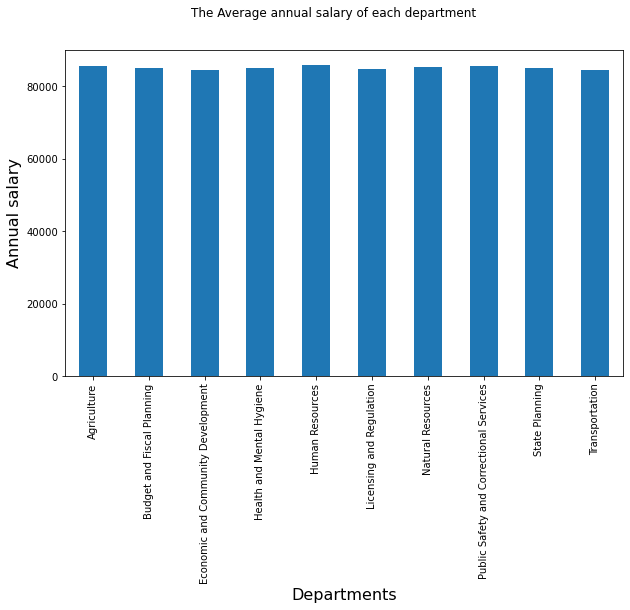

In [426]:
#1
fig, axs = plt.subplots(figsize=(10, 6))
g_df2 = df5.groupby('Dep_name')["Annual_salary"].mean().plot(kind='bar', rot=90, ax=axs)
fig.suptitle('The Average annual salary of each department ',fontsize=12)
plt.xlabel("Departments",fontsize=16)
plt.ylabel("Annual salary",fontsize=16)

In [430]:
gdf3 = df5.groupby(['state','Dep_name'])

In [431]:
count = 0
for Hour, group in gdf3:
    count = count +1
    #print(Department_name)
    print(group, "\n")
print(count)

      Dep_ID     Dep_name  Emp_id       name  last_name        state  \
9068      10  Agriculture   37142       Lori  Valentine  Connecticut   
9072      10  Agriculture   31641     Daniel     Vargas  Connecticut   
9076      10  Agriculture   10680    Melissa       Duke  Connecticut   
9088      10  Agriculture   97668  Christine      Smith  Connecticut   
9104      10  Agriculture   96126    Richard      Moore  Connecticut   
...      ...          ...     ...        ...        ...          ...   
9898      10  Agriculture   77407  Christina      Myers  Connecticut   
9906      10  Agriculture   80841     Angela      Hardy  Connecticut   
9946      10  Agriculture   13130      Nancy      Scott  Connecticut   
9956      10  Agriculture   78476      Jamie     Castro  Connecticut   
9978      10  Agriculture   87734      Scott   Carrillo  Connecticut   

          number  Annual_salary  
9068  8757520276          68071  
9072  6458275332          81285  
9076  9094087708          85505  

      Dep_ID                   Dep_name  Emp_id      name  last_name  \
56         1  Health and Mental Hygiene   13543   Jasmine      Smith   
79         1  Health and Mental Hygiene   12647     Sarah   Richards   
80         1  Health and Mental Hygiene   69635     David    Gardner   
94         1  Health and Mental Hygiene   85186      John   Thompson   
99         1  Health and Mental Hygiene   11735      Dale       Ruiz   
...      ...                        ...     ...       ...        ...   
1003       1  Health and Mental Hygiene   21476     Nancy   Anderson   
1010       1  Health and Mental Hygiene   45685   Tiffany      Jones   
1011       1  Health and Mental Hygiene   91110   Michael  Gutierrez   
1013       1  Health and Mental Hygiene   41219   William    Johnson   
1021       1  Health and Mental Hygiene   74062  Michelle     Juarez   

         state      number  Annual_salary  
56    Delaware  1759286025          67614  
79    Delaware  6178731739          91841  
80 

[75 rows x 8 columns] 

     Dep_ID                   Dep_name  Emp_id         name last_name  \
2         1  Health and Mental Hygiene   40236        Erica      Bell   
6         1  Health and Mental Hygiene   80798        Erica      Ruiz   
29        1  Health and Mental Hygiene   81545  Christopher    Bowman   
47        1  Health and Mental Hygiene   80950        Kelly      Pace   
49        1  Health and Mental Hygiene   19639       Joshua     Walsh   
..      ...                        ...     ...          ...       ...   
930       1  Health and Mental Hygiene   38349      Michael      Gray   
934       1  Health and Mental Hygiene   90533      Jessica  Williams   
964       1  Health and Mental Hygiene   12423        Kelly    Martin   
972       1  Health and Mental Hygiene   68491      Patrick    Snyder   
981       1  Health and Mental Hygiene   79717        Kevin     Moore   

       state      number  Annual_salary  
2    Georgia  3178325144          73715  
6    Georgia  4

      Dep_ID         Dep_name  Emp_id      name  last_name  state      number  \
4075       5  Human Resources   32017  Mckenzie     Walker  Maine  2223416862   
4077       5  Human Resources   91976  Jennifer  Hernandez  Maine  5826895815   
4086       5  Human Resources   61772      Paul  Gutierrez  Maine  1033072020   
4109       5  Human Resources   58530    Rhonda    Stewart  Maine  3427978314   
4117       5  Human Resources   59758    Cheryl    Alvarez  Maine  3683373686   
...      ...              ...     ...       ...        ...    ...         ...   
5013       5  Human Resources   78754      John    Burgess  Maine  2415912704   
5020       5  Human Resources   35963     Aaron    Collins  Maine  5089025021   
5034       5  Human Resources   51275   Gregory     Mosley  Maine  7314225836   
5066       5  Human Resources   38032  Patricia      White  Maine  6026192049   
5070       5  Human Resources   29986     James   Saunders  Maine  9602935093   

      Annual_salary  
4075 

      Dep_ID           Dep_name  Emp_id    name last_name     state  \
2096       3  Natural Resources   31236  Daniel   Herring  Maryland   
2104       3  Natural Resources   98836  Robert      Rios  Maryland   
2109       3  Natural Resources   22442   James     Sharp  Maryland   
2170       3  Natural Resources   22709  Brandi      King  Maryland   
2177       3  Natural Resources   98172     Amy    Gibson  Maryland   
...      ...                ...     ...     ...       ...       ...   
3012       3  Natural Resources   35951     Amy     Poole  Maryland   
3054       3  Natural Resources   47872  Amanda   Schmidt  Maryland   
3068       3  Natural Resources   77812   Scott     Hayes  Maryland   
3072       3  Natural Resources   10347    Juan       Kim  Maryland   
3073       3  Natural Resources   50978    Tina    Thomas  Maryland   

          number  Annual_salary  
2096  8090701099          96603  
2104  9423448777         108390  
2109  8519117244          74972  
2170  27985

      Dep_ID        Dep_name  Emp_id         name last_name          state  \
3085       4  State Planning   20367     Nicholas      Hunt  New Hampshire   
3097       4  State Planning   87802        Keith    Hansen  New Hampshire   
3105       4  State Planning   53330      Zachary    Oliver  New Hampshire   
3163       4  State Planning   28028      Colleen     Jones  New Hampshire   
3176       4  State Planning   26080       Robert    Ortega  New Hampshire   
...      ...             ...     ...          ...       ...            ...   
4016       4  State Planning   28755         Beth   Schmidt  New Hampshire   
4019       4  State Planning   21623      Jessica    Warren  New Hampshire   
4029       4  State Planning   12448  Christopher    Rogers  New Hampshire   
4035       4  State Planning   81952     Michelle   Delgado  New Hampshire   
4063       4  State Planning   34410      Timothy     Gomez  New Hampshire   

          number  Annual_salary  
3085  9328274099          941

[89 rows x 8 columns] 

      Dep_ID        Dep_name  Emp_id      name  last_name     state  \
8129       9  Transportation   63426    Austin   Bradford  New York   
8130       9  Transportation   33985    Monica     Garcia  New York   
8158       9  Transportation   58743   William     Wright  New York   
8163       9  Transportation   10458     Robin    Bradley  New York   
8168       9  Transportation   64290  Gabriela   Martinez  New York   
...      ...             ...     ...       ...        ...       ...   
8974       9  Transportation   98976    Robert    Johnson  New York   
8990       9  Transportation   55969     Kelly      Lewis  New York   
9000       9  Transportation   20107   Cynthia  Hendricks  New York   
9036       9  Transportation   12327     Brian      White  New York   
9050       9  Transportation   19527     Kayla      Davis  New York   

          number  Annual_salary  
8129  3468378989         100015  
8130  2371528728          88452  
8158  8846713953     

[65 rows x 8 columns] 

      Dep_ID        Dep_name  Emp_id       name   last_name         state  \
8073       9  Transportation   41873     Thomas        Shaw  Rhode Island   
8087       9  Transportation   17440      Tyler      Palmer  Rhode Island   
8090       9  Transportation   23078    William       Olson  Rhode Island   
8102       9  Transportation   41989    Bradley     Bennett  Rhode Island   
8107       9  Transportation   24587       Lisa       Jones  Rhode Island   
...      ...             ...     ...        ...         ...           ...   
8997       9  Transportation   66801  Catherine       Evans  Rhode Island   
8998       9  Transportation   68756    Matthew    Matthews  Rhode Island   
9002       9  Transportation   66986    Brianna      Weaver  Rhode Island   
9021       9  Transportation   74108      Bryan       Davis  Rhode Island   
9031       9  Transportation   78327       John  Richardson  Rhode Island   

          number  Annual_salary  
8073  3957594153 

      Dep_ID           Dep_name  Emp_id         name  last_name     state  \
2088       3  Natural Resources   48690      Patrick   Campbell  Virginia   
2106       3  Natural Resources   52694       Hannah  Rodriguez  Virginia   
2115       3  Natural Resources   28202      Matthew   Mcdaniel  Virginia   
2121       3  Natural Resources   64508        Emily      Sharp  Virginia   
2136       3  Natural Resources   44517      Brianna    Shannon  Virginia   
...      ...                ...     ...          ...        ...       ...   
3029       3  Natural Resources   82331        Megan     Hughes  Virginia   
3041       3  Natural Resources   50220  Christopher     Farmer  Virginia   
3050       3  Natural Resources   28109       Steven     Garcia  Virginia   
3064       3  Natural Resources   30313     Jennifer     Fuller  Virginia   
3071       3  Natural Resources   80415        Maria     Brooks  Virginia   

          number  Annual_salary  
2088  5080461972          84996  
2106  5

Text(0, 0.5, 'No of Employees in each department and state')

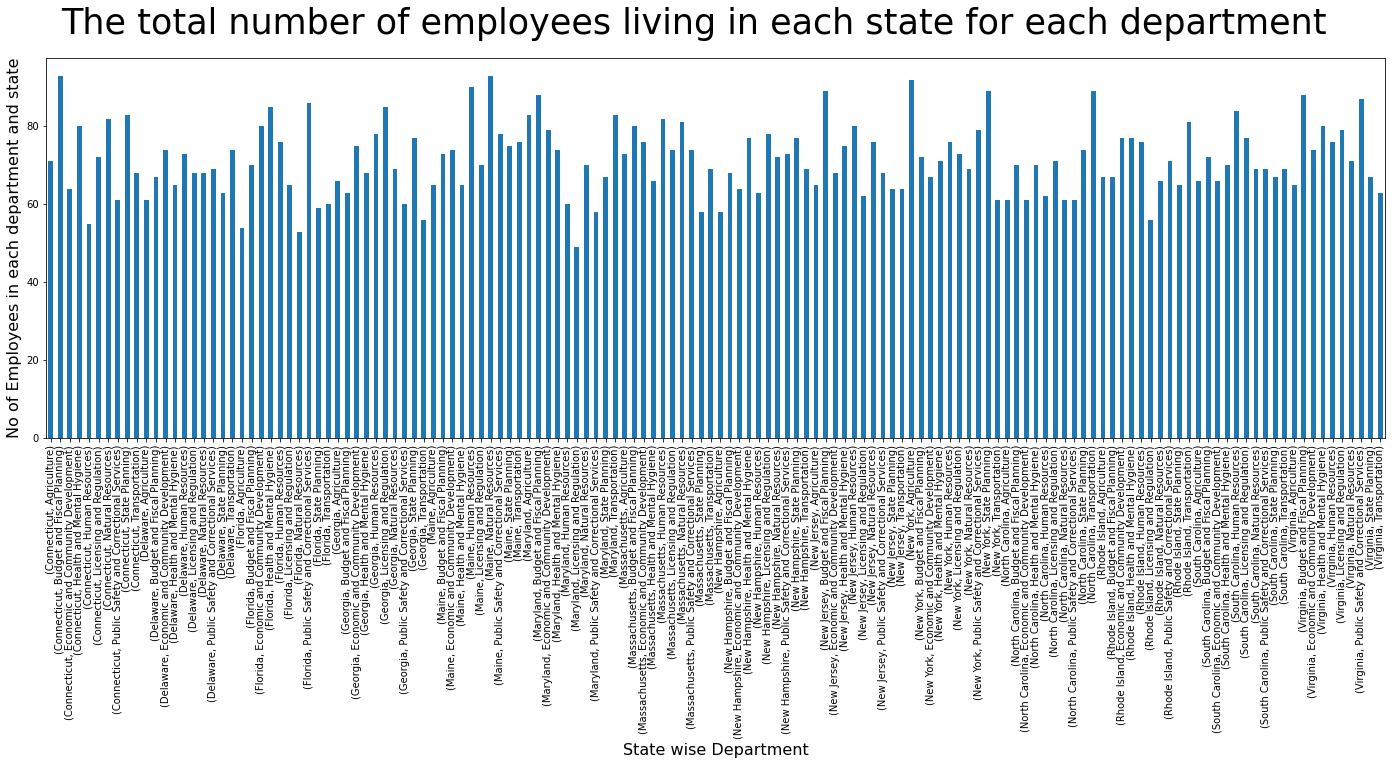

In [434]:
#2
fig, axs = plt.subplots(figsize=(24, 7))
gdf3.size().plot(kind='bar', rot=90, ax=axs)
fig.suptitle('The total number of employees living in each state for each department',fontsize=35)
plt.xlabel("State wise Department",fontsize=16)
plt.ylabel("No of Employees in each department and state",fontsize=16)

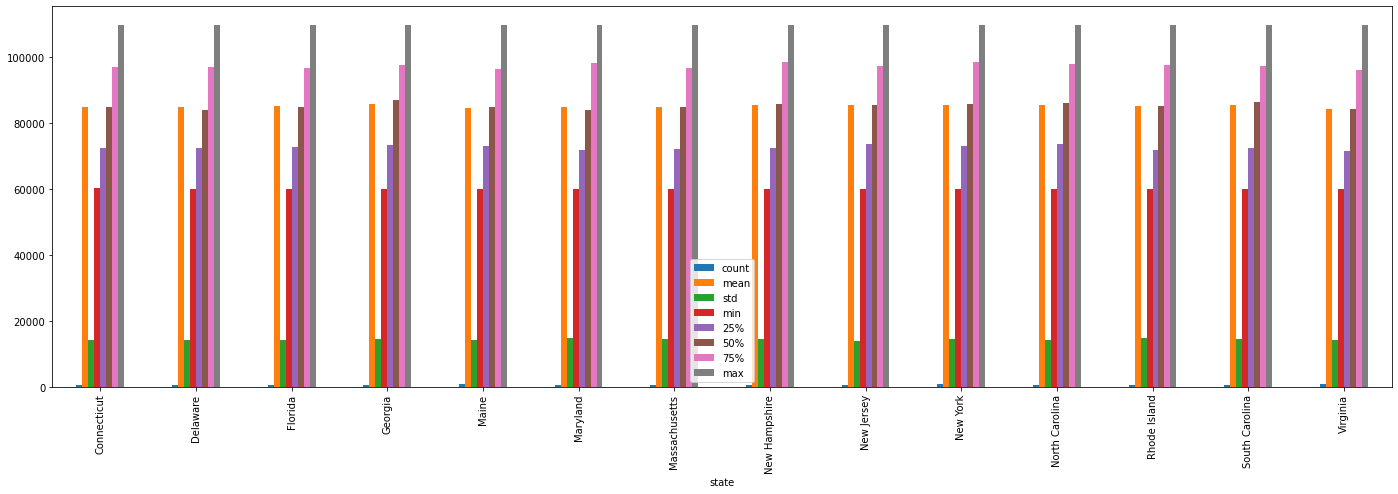

In [442]:
#3
fig, axs = plt.subplots(figsize=(24, 7))
gdf4 = df5.groupby('state')["Annual_salary"].describe().plot(kind='bar', rot=90, ax=axs)

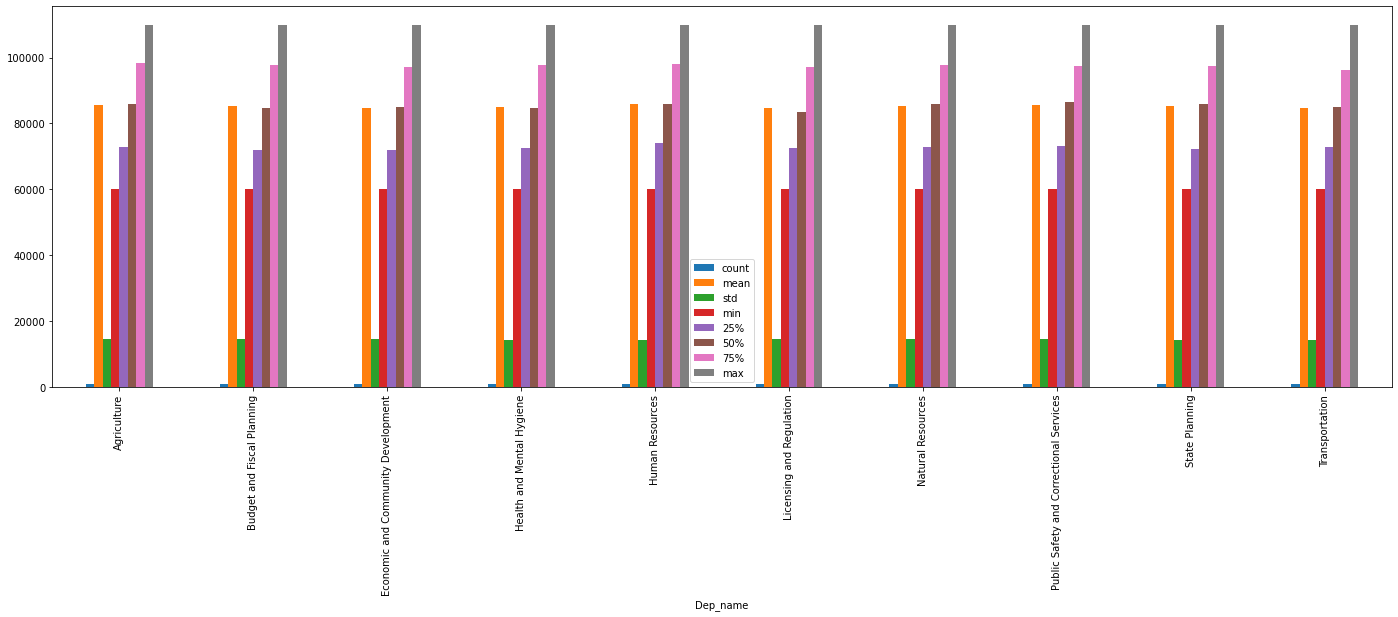

In [447]:
fig, axs = plt.subplots(figsize=(24, 7))
gdf6 = df5.groupby('Dep_name')["Annual_salary"].describe().plot(kind='bar', rot=90, ax=axs)